In [ ]:
!pip install --quiet langchain langchain_community langchain-openai langchain-experimental neo4j py2neo openai tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.0 MB/s eta 0:00:00


In [ ]:
from langchain_openai import AzureChatOpenAI

In [ ]:
pip install -U :class:`~langchain-openai

/bin/bash: -c: line 1: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [ ]:
pip install json-repair

In [ ]:
pip install -U langchain langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.5 MB/s eta 0:00:00
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.21
    Uninstalling langchain-0.3.21:
      Successfully uninstalled langchain-0.3.21


In [ ]:
LANGSMITH_TRACING= True
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY="ADD_API_KEY"
LANGSMITH_PROJECT="pr-earnest-inspection-19"

Adding credentials to connect with AZURE OPENAI API

In [ ]:
import os
from langchain_openai import AzureChatOpenAI
from langchain_experimental.graph_transformers import LLMGraphTransformer

# LangChain / Graph
from langchain_community.graphs import Neo4jGraph
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_core.documents import Document
from openai import OpenAI
import os
from langchain_openai import AzureChatOpenAI
from langchain_experimental.graph_transformers import LLMGraphTransformer
# Set Azure OpenAI API Details
os.environ["AZURE_OPENAI_API_KEY"] = "ADD_API_KEY"
os.environ["AZURE_OPENAI_ENDPOINT"] = "https://llm-data-quality.openai.azure.com/"
os.environ["AZURE_OPENAI_DEPLOYMENT"] = "gpt-4o"  # Must match Azure
os.environ["AZURE_OPENAI_API_VERSION"] = "2024-08-01-preview"  # Recommended version

# Initialize AzureChatOpenAI (Fixed format)
llm = AzureChatOpenAI(
    azure_endpoint=os.environ["AZURE_OPENAI_ENDPOINT"],
    azure_deployment=os.environ["AZURE_OPENAI_DEPLOYMENT"],
    api_key=os.environ["AZURE_OPENAI_API_KEY"],
    api_version=os.environ["AZURE_OPENAI_API_VERSION"],
    temperature=0.0
)

# Test the connection with .invoke()
try:
    response = llm.invoke(
        [{"role": "system", "content": "Hello, can you confirm this works?"}]
    )
    print("✅ Azure OpenAI is working!")
    print(response)
except Exception as e:
    print("❌ Azure OpenAI is NOT working:", e)

# Create LLM->Graph transformer
llm_transformer = LLMGraphTransformer(llm=llm)


✅ Azure OpenAI is working!
content='Yes, I can confirm that this works! How can I assist you today? 😊' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 15, 'total_tokens': 33, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ded0d14823', 'id': 'chatcmpl-BHuEhAjekgWf0swxPvyACKhkHBhfJ', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}} id='run-bc1b16c4-ace4-4936-a164-05c032feabb4-0' usage_metadata={'input_token

In [ ]:
!neo4j start

/bin/bash: line 1: neo4j: command not found


In [ ]:
from neo4j import GraphDatabase

# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI = "neo4j+s://8ee3c741.databases.neo4j.io"
AUTH = ("neo4j", "ADD_KEY")

with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

Making a **small graph using text** from website on Neo4jAura

---



In [ ]:
#Provide text from Bosch power tools
text = """
The Bosch GNH18V-18M is an 18V Brushless 18-gauge Brad Nailer offering cordless convenience.
It uses a CORE18V 4 Ah battery, delivering up to 2,000 nails per charge.
Key features include a Dry-fire lockout to prevent damage,
and an intuitive user interface toggling between single and bump-fire modes.
"""

documents = [Document(page_content=text)]



In [ ]:
#Convert to Graph
graph_docs = llm_transformer.convert_to_graph_documents(documents)

# Initialize the Neo4jGraph object with URI and authentication details
from langchain_community.graphs import Neo4jGraph # Import the necessary class
graph = Neo4jGraph(url=URI, username=AUTH[0], password=AUTH[1])

if graph_docs:
    # Print extracted info
    for node in graph_docs[0].nodes:
        print("Node =>", node)
    for rel in graph_docs[0].relationships:
        print("Relation =>", rel)
    # Insert into Neo4j
    graph.add_graph_documents(graph_docs)

<ipython-input-18-6061cdef3003>:6: LangChainDeprecationWarning: The class `Neo4jGraph` was deprecated in LangChain 0.3.8 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-neo4j package and should be used instead. To use it run `pip install -U :class:`~langchain-neo4j` and import as `from :class:`~langchain_neo4j import Neo4jGraph``.
  graph = Neo4jGraph(url=URI, username=AUTH[0], password=AUTH[1])


Node => id='Bosch Gnh18V-18M' type='Product' properties={}
Node => id='Core18V 4 Ah Battery' type='Product' properties={}
Node => id='Dry-Fire Lockout' type='Feature' properties={}
Node => id='Intuitive User Interface' type='Feature' properties={}
Node => id='Single-Fire Mode' type='Feature' properties={}
Node => id='Bump-Fire Mode' type='Feature' properties={}
Relation => source=Node(id='Bosch Gnh18V-18M', type='Product', properties={}) target=Node(id='Core18V 4 Ah Battery', type='Product', properties={}) type='USES' properties={}
Relation => source=Node(id='Bosch Gnh18V-18M', type='Product', properties={}) target=Node(id='Dry-Fire Lockout', type='Feature', properties={}) type='HAS_FEATURE' properties={}
Relation => source=Node(id='Bosch Gnh18V-18M', type='Product', properties={}) target=Node(id='Intuitive User Interface', type='Feature', properties={}) type='HAS_FEATURE' properties={}
Relation => source=Node(id='Intuitive User Interface', type='Feature', properties={}) target=Node(id

Retrieving **data from the graph**

---




In [ ]:
from neo4j import GraphDatabase

class Neo4jQuery:
    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self.driver.close()

    def fetch_tool_features(self, tool_name):
        query = """
        MATCH (t:Product {id: $tool_name})-[:HAS_FEATURE]->(f:Feature)
        RETURN f.id AS feature_name
        """
        with self.driver.session() as session:
            result = session.run(query, tool_name=tool_name)
            return [record["feature_name"] for record in result]

    def fetch_tool_info(self, tool_name):
        """Fetches tool information from Neo4j."""
        # This is a placeholder. You'll need to define the actual query
        # to retrieve the necessary tool information.
        # Adjust the query and return value as needed.
        query = """
            MATCH (t:Product {id: $tool_name})
            RETURN t
        """
        with self.driver.session() as session:
            result = session.run(query, tool_name=tool_name)
            # Process the result to extract the desired tool information.
            # For example, you might return a dictionary of tool attributes.
            tool_info = {}
            for record in result:
                tool_node = record["t"]
                tool_info["features"] = list(tool_node.get("features", []))
                # Add more properties as needed
            return tool_info

# Connect to Neo4j
neo4j_query = Neo4jQuery(URI, AUTH[0], AUTH[1])

# Fetch features for Bosch Gnh18V-18M
tool_features = neo4j_query.fetch_tool_features("Bosch Gnh18V-18M")
print("Retrieved Features:", tool_features)

Retrieved Features: ['Dry-Fire Lockout', 'Intuitive User Interface']


In [ ]:
def extract_tool_references(text):
    """
    Extract potential tool names & numeric references using regex.
    """
    tool_pattern = re.compile(r"\b(Bosch\s[\w\d-]+)\b", re.IGNORECASE)  # Detect "Bosch Gnh18V-18M"
    number_pattern = re.compile(r"(\d+\.?\d*)\s?(Nm|V|RPM|PSI)")  # Detect torque/voltage/speed

    tool_matches = tool_pattern.findall(text)
    number_matches = number_pattern.findall(text)

    extracted_numbers = [f"{num} {unit}" for num, unit in number_matches]

    return {
        "tools": list(set(tool_matches)),  # Remove duplicates
        "numbers": extracted_numbers
    }

In [ ]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 45.9 MB/s eta 0:00:00


Generating large **synthetic data via Azure Open AI API** key, Scaling the data

In [ ]:
import openai
import pandas as pd
import os
import re

# --- Azure OpenAI Setup ---
client = openai.AzureOpenAI(
    api_key=os.environ["AZURE_OPENAI_API_KEY"],
    api_version=os.environ["AZURE_OPENAI_API_VERSION"],
    azure_endpoint=os.environ["AZURE_OPENAI_ENDPOINT"]
)

def generate_synthetic_reviews(n=500):
    """Generate structured synthetic reviews using OpenAI and return raw response."""
    system_prompt = f"""
    You are a power tool expert generating **structured customer reviews** in CSV format.

    **CSV Format (each row must follow this structure):**
    Product_ID, Product_Name, Category, Review, Review_Date

    **Rules:**
    - **Product_Name & Category**: Use realistic Bosch power tools (drills, saws, grinders, etc.).
    - **Review**:
      - Must describe **realistic power tool features** (e.g., torque, battery life).
      - **10% of reviews should have errors**:
        - **Semantic Errors** (wrong tool names, typos).
        - **Technical Errors** (incorrect torque, voltage, material use).
    - **Date Format**: MM/DD/YYYY
    - **Strictly output valid CSV rows. DO NOT add explanations.**
    """

    user_prompt = f"Generate {n} structured, varied customer reviews in the exact format above."

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ],
        temperature=0.7
    )

    output_text = response.choices[0].message.content.strip()

    # Print raw response for debugging
    print("\n **Raw API Response:**\n", output_text, "\n")

    return output_text

def parse_ai_data(ai_data):
    """
    Parses AI-generated CSV-like text into a structured Pandas DataFrame.
    - Removes unwanted words like "csv".
    - Ensures proper column separation.
    - Handles common formatting issues.
    """
    try:
        # Remove unwanted prefixes (like "csv" or extra numbers at the start)
        clean_data = re.sub(r"^(csv\s+)", "", ai_data, count=1)

        # Split rows by newline
        rows = clean_data.strip().split("\n")

        # Ensure correct CSV-like structure
        structured_rows = [row.strip() for row in rows if row.count(",") >= 4]  # At least 4 commas to ensure 5 columns

        # Split into columns
        parsed_data = [row.split(",", maxsplit=4) for row in structured_rows]  # Ensures only 5 columns

        # Convert to DataFrame
        df = pd.DataFrame(parsed_data, columns=["Product_ID", "Product_Name", "Category", "Review", "Review_Date"])

        # Ensure Review_Date is in proper date format
        df["Review_Date"] = pd.to_datetime(df["Review_Date"], errors="coerce")

        return df

    except Exception as e:
        print(f" Error processing AI-generated data: {e}")
        return None

# --- Generate 10 Reviews (for Debugging) ---
num_reviews = 500
ai_data = generate_synthetic_reviews(num_reviews)

if ai_data:
    print("\n✅ **AI-Generated Data Successfully Retrieved**")

    # Parse AI data into structured format
    df = parse_ai_data(ai_data)

    if df is not None:

        # Save to CSV
        csv_path = "/content/Reviews500.csv"
        df.to_csv(csv_path, index=False)

        print(f"\n **Structured Data Saved:** {csv_path}")



 **Raw API Response:**
 ```csv
Product_ID,Product_Name,Category,Review,Review_Date
101,Bosch GSB 18V-55,Cordless Drill,"Excellent torque and battery life. Perfect for heavy-duty drilling tasks.",01/15/2023
102,Bosch GWS 18V-10 C,Cordless Grinder,"Powerful yet compact. Cuts through metal like butter.",02/10/2023
103,Bosch GST 18V-LI B,Cordless Jigsaw,"Smooth performance on wood and plastic. Blade change is seamless.",03/08/2023
104,Bosch GCM 12 SDE,Miter Saw,"Very accurate and sturdy. The variable speed feature is great.",04/25/2023
105,Bosch GSB 18V-55,Cordless Drill,"Battery drains too quickly for extended use. Not ideal for professionals.",05/12/2023
106,Bosch GKS 18V-57 C,Cordless Circular Saw,"Lightweight and precise. Cuts through hardwood effortlessly.",06/07/2023
107,Bosch GWS 18V-10 C,Cordless Grinder,"The handle is uncomfortable for prolonged use. Needs improvement.",07/02/2023
108,Bosch GBH 18V-26,Cordless Rotary Hammer,"Unmatched performance on concrete. Vibration control wo

<ipython-input-14-f7c4fbe844cf>:74: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Review_Date"] = pd.to_datetime(df["Review_Date"], errors="coerce")


In [ ]:
from google.colab import files

# Save DataFrame to CSV
csv_path = "100Reviews_new.csv"
df.to_csv(csv_path, index=False)

# Download the file
files.download(csv_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Let's define the graph now

testing below

In [ ]:
from neo4j import GraphDatabase

URI = "neo4j+s://8ee3c741.databases.neo4j.io"
AUTH = ("neo4j", "ADD_PWD")

driver = GraphDatabase.driver(URI, auth=AUTH)

def create_constraints():
    constraints = [
        "CREATE CONSTRAINT IF NOT EXISTS FOR (t:Tool)       REQUIRE t.name IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (s:Scenario)   REQUIRE s.scenarioID IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (c:Constraint) REQUIRE c.id IS UNIQUE",
    ]
    with driver.session() as session:
        for cql in constraints:
            session.run(cql)
        print("✅ Created/ensured constraints for Tools, Scenarios, Constraints")

create_constraints()


✅ Created/ensured constraints for Tools, Scenarios, Constraints


In [ ]:
!pip uninstall fitz -y #remove the incorrect install
!pip install pymupdf # install the correct package

import pymupdf as fitz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 34.5 MB/s eta 0:00:00


In [ ]:
def extract_text_from_pdf(pdf_path):
    text = ""
    doc = fitz.open(pdf_path)
    for page in doc:
        text += page.get_text() + "\n"
    return text

pdf_path = "/content/Specification Sheet (2).pdf"
raw_pdf_text = extract_text_from_pdf(pdf_path)

In [ ]:
import openai, os, json

# Set Azure Open AI credentials
openai.api_type = "azure"
openai.api_key = os.environ["AZURE_OPENAI_API_KEY"]  # Your Azure key
openai.api_version = os.environ["AZURE_OPENAI_API_VERSION"]  # e.g., "2023-07-01-preview"
openai.api_base = os.environ["AZURE_OPENAI_ENDPOINT"]  # e.g., "https://<resource-name>.openai.azure.com/"

# Define your strict system prompt
system_prompt = """
You are an AI that extracts knowledge graph objects from text.
Output a valid JSON object with exactly two keys: "nodes" and "relationships".

Use only these node types:
- Tool
- Scenario
- Constraint

And only these relationship types:
- HAS_SCENARIO (Tool → Scenario)
- HAS_CONSTRAINT (Tool → Constraint)

For each Tool node, extract these properties:
  - name (string)            // e.g., "Bosch GNH18V-18M Professional"
  - category (string)        // e.g., "Nailer", "Drill", etc.
  - brand (string)           // e.g., "Bosch"
  - typicalVoltage (string)  // e.g., "18V"
  - torqueRange (string)     // e.g., "0–1330 in-lbs" or "N/A"
  - rpmRange (string)        // e.g., "0–2200" or "N/A"
  - weight (string or number)// e.g., "6.8 lb"
  - synonyms ([string])      // e.g., ["Bosch GNH18", "GNH18 Nailer"]
  - recommendedScenarios ([string])  // e.g., ["cold_environment"]

For each Scenario node, extract:
  - scenarioID (string)
  - temperatureRange (string)
  - recommendedVoltage (string)
  - recommendedTorque (string)
  - recommendedBattery (string)
  - notes (string)

For each Constraint node, extract:
  - id (string)
  - type (string)       // e.g., "voltage", "torque", "rpm"
  - minValue (number)
  - maxValue (number)
  - unit (string)       // e.g., "Nm", "V"
  - context (string)    // e.g., "heavyDuty", "coldEnvironment"

Relationships allowed:
  - HAS_SCENARIO (Tool → Scenario)
  - HAS_CONSTRAINT (Tool → Constraint)

Output your results as valid JSON with two arrays: "nodes" and "relationships".
Do not include any extra commentary or additional node types.
Example Output (JSON):
{
  "nodes": [
    {
      "type": "Tool",
      "properties": {
         "name": "Bosch GNH18V-18M Professional",
         "category": "Nailer",
         "brand": "Bosch",
         "typicalVoltage": "18V",
         "torqueRange": "N/A",
         "rpmRange": "N/A",
         "weight": "6.8 lb",
         "synonyms": ["Bosch GNH18", "GNH18 Nailer"],
         "recommendedScenarios": ["cold_environment"]
      }
    }
  ],
  "relationships": []
}
"""

# Extract the graph from the PDF text: We'll include the extracted text in the user prompt

pdf_path = "/content/Specification Sheet (2).pdf"
raw_pdf_text = extract_text_from_pdf(pdf_path)
user_prompt = f"Extract the graph objects as JSON according to the instructions above from the following text:\n{raw_pdf_text}"

# Initialize Azure OpenAI client
client = openai.AzureOpenAI(
    api_key=os.environ["AZURE_OPENAI_API_KEY"],
    api_version=os.environ["AZURE_OPENAI_API_VERSION"],
    azure_endpoint=os.environ["AZURE_OPENAI_ENDPOINT"]
)

# Make the API call:
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
    ],
    temperature=0.0
)

graph_json = response.choices[0].message.content

# Find the start and end of the JSON object
start_index = graph_json.find("{")
end_index = graph_json.rfind("}") + 1  # Add 1 to include the closing brace

# Extract only the JSON string
graph_json_clean = graph_json[start_index:end_index]

# Parse the JSON into a Python dictionary
graph_data = json.loads(graph_json_clean)
print(graph_data)

{'nodes': [{'type': 'Tool', 'properties': {'name': 'GSH18V-5L PROFESSIONAL', 'category': 'Hammer', 'brand': 'Bosch', 'typicalVoltage': '18V', 'torqueRange': 'N/A', 'rpmRange': '0–3050 BPM', 'weight': 11.7, 'synonyms': ['GSH18V-5', 'SDS-max Hammer'], 'recommendedScenarios': ['cold_environment']}}, {'type': 'Tool', 'properties': {'name': 'GSR18V-1330CN PROFESSIONAL', 'category': 'Drill', 'brand': 'Bosch', 'typicalVoltage': '18V', 'torqueRange': '0–1330 in-lbs', 'rpmRange': '0–2200', 'weight': 4.6, 'synonyms': ['GSR18V-1330C', 'Cordless Drill'], 'recommendedScenarios': ['cold_environment']}}, {'type': 'Tool', 'properties': {'name': 'GKF18V-25N PROFESSIONAL', 'category': 'Router', 'brand': 'Bosch', 'typicalVoltage': '18V', 'torqueRange': 'N/A', 'rpmRange': '10,000–30,000', 'weight': 2.4, 'synonyms': ['GKF18V-25', 'Cordless Router'], 'recommendedScenarios': ['cold_environment']}}, {'type': 'Tool', 'properties': {'name': 'GWX18V-10PN PROFESSIONAL', 'category': 'Angle Grinder', 'brand': 'Bosc

In [ ]:
from typing import Dict, Any #Import Dict for type hinting

def insert_graph_document_from_data(graph_data: Dict[str, Any]):
    with driver.session() as session:
        # Insert Nodes
        for node in graph_data["nodes"]:
            node_type = node["type"]
            props = node["properties"]
            # Create a unique ID from name or scenarioID or id
            unique_id = props.get("name") or props.get("scenarioID") or props.get("id") or f"node_{hash(json.dumps(props))}"
            query = f"""
            MERGE (n:{node_type} {{uniqueId: $uid}})
            SET n += $props
            """
            session.run(query, uid=unique_id, props=props)

        # Insert Relationships
        for rel in graph_data["relationships"]:
            # Get start and end node IDs using 'from' and 'to' keys
            start_id = rel["from"]  # Use 'from' instead of 'startNode'
            end_id = rel["to"]    # Use 'to' instead of 'endNode'
            rel_type = rel["type"]
            rel_props = rel.get("properties", {})
            query = f"""
            MATCH (start {{uniqueId: $startId}}), (end {{uniqueId: $endId}})
            MERGE (start)-[r:{rel_type}]->(end)
            SET r += $relProps
            """
            session.run(query, startId=start_id, endId=end_id, relProps=rel_props)

# Call the function to insert the graph data
insert_graph_document_from_data(graph_data)
print("✅ Inserted the extracted graph into Neo4j!")

driver.close()

<ipython-input-16-349ed4c02a3c>:4: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


✅ Inserted the extracted graph into Neo4j!


In [ ]:
import openai
import os
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain.docstore.document import Document
from langchain_openai import AzureChatOpenAI

client = openai.AzureOpenAI(
    api_key=os.environ["AZURE_OPENAI_API_KEY"],
    api_version=os.environ["AZURE_OPENAI_API_VERSION"],
    azure_endpoint=os.environ["AZURE_OPENAI_ENDPOINT"]
)


# Initialize AzureChatOpenAI (Fixed format)
llm = AzureChatOpenAI(
    azure_endpoint=os.environ["AZURE_OPENAI_ENDPOINT"],
    azure_deployment=os.environ["AZURE_OPENAI_DEPLOYMENT"],
    api_key=os.environ["AZURE_OPENAI_API_KEY"],
    api_version=os.environ["AZURE_OPENAI_API_VERSION"],
    temperature=0.0
)

system_prompt = """
You are an AI that extracts knowledge graph objects from text.
Focus on these node types:

(:Tool)
  name, category, brand, typicalVoltage, torqueRange, rpmRange, weight, synonyms, recommendedScenarios

(:Scenario)
  scenarioID, temperatureRange, recommendedVoltage, recommendedTorque, recommendedBattery, notes

(:Constraint)
  id, type, minValue, maxValue, unit, context

Represent each node as a dictionary in a "nodes" array,
and each relationship as a dictionary in a "relationships" array.

Example Output (JSON):
{
  "nodes": [
    {
      "type": "Tool",
      "properties": {
        "name": "Bosch GNH18V-15MA",
        "category": "Nailer",
        "brand": "Bosch",
        "typicalVoltage": "18V",
        "torqueRange": "N/A",
        "rpmRange": "N/A",
        "weight": "6.8 lb",
        "synonyms": ["GNH18", "Bosch Nailer"],
        "recommendedScenarios": ["cold_environment"]
      }
    },
    {
      "type": "Scenario",
      "properties": {
        "scenarioID": "cold_environment",
        "temperatureRange": "-10 to 5C",
        "recommendedVoltage": "18V only",
        "recommendedTorque": "N/A",
        "recommendedBattery": "CORE18V 4Ah",
        "notes": "For low temperatures"
      }
    }
  ],
  "relationships": [
    {
      "startNode": "Bosch GNH18V-15MA",
      "endNode": "cold_environment",
      "type": "HAS_SCENARIO",
      "properties": {}
    }
  ]
}
Only output valid JSON, no extra commentary.
"""

graph_transformer = LLMGraphTransformer(
    llm=llm  # Pass the initialized llm object
)

In [ ]:
from langchain.docstore.document import Document

document = Document(page_content=raw_pdf_text)

# Possibly chunk or summarize if text is too large
# the system_prompt argument has been removed from the call
# to convert_to_graph_documents as it is an invalid argument.
graph_docs = graph_transformer.convert_to_graph_documents(
    documents=[document],
)

print("Extracted Graph Docs:", graph_docs)

Extracted Graph Docs: [GraphDocument(nodes=[Node(id='Gnh18V-15Ma', type='Tool', properties={}), Node(id='Gho12V-08N', type='Tool', properties={}), Node(id='Gho18V-26N', type='Tool', properties={}), Node(id='Gth18V-18Mn', type='Tool', properties={}), Node(id='Gsr18V-755Cb25', type='Tool', properties={}), Node(id='Gnh18V-16Man', type='Tool', properties={}), Node(id='Gbl18V-450N', type='Tool', properties={})], relationships=[Relationship(source=Node(id='Gnh18V-15Ma', type='Tool', properties={}), target=Node(id='Gnh15G125Gv', type='Accessory', properties={}), type='WORKS_WITH', properties={}), Relationship(source=Node(id='Gnh18V-15Ma', type='Tool', properties={}), target=Node(id='Gnh15G150Gv', type='Accessory', properties={}), type='WORKS_WITH', properties={}), Relationship(source=Node(id='Gnh18V-15Ma', type='Tool', properties={}), target=Node(id='Gnh15G175Gv', type='Accessory', properties={}), type='WORKS_WITH', properties={}), Relationship(source=Node(id='Gnh18V-15Ma', type='Tool', prope

In [ ]:
from langchain_community.graphs import Neo4jGraph

graph = Neo4jGraph(url=URI, username=AUTH[0], password=AUTH[1])

if graph_docs and len(graph_docs) > 0:
    doc_graph = graph_docs[0]
    # Print for debugging
    print("Nodes =>", doc_graph.nodes)
    print("Relationships =>", doc_graph.relationships)

    # Insert into Neo4j
    graph.add_graph_documents(graph_docs)
    print("✅ Inserted the PDF-based graph into Neo4j!")


<ipython-input-21-fe023b69b18d>:3: LangChainDeprecationWarning: The class `Neo4jGraph` was deprecated in LangChain 0.3.8 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-neo4j package and should be used instead. To use it run `pip install -U :class:`~langchain-neo4j` and import as `from :class:`~langchain_neo4j import Neo4jGraph``.
  graph = Neo4jGraph(url=URI, username=AUTH[0], password=AUTH[1])


Nodes => [Node(id='Gnh18V-15Ma', type='Tool', properties={}), Node(id='Gho12V-08N', type='Tool', properties={}), Node(id='Gho18V-26N', type='Tool', properties={}), Node(id='Gth18V-18Mn', type='Tool', properties={}), Node(id='Gsr18V-755Cb25', type='Tool', properties={}), Node(id='Gnh18V-16Man', type='Tool', properties={}), Node(id='Gbl18V-450N', type='Tool', properties={})]
Relationships => [Relationship(source=Node(id='Gnh18V-15Ma', type='Tool', properties={}), target=Node(id='Gnh15G125Gv', type='Accessory', properties={}), type='WORKS_WITH', properties={}), Relationship(source=Node(id='Gnh18V-15Ma', type='Tool', properties={}), target=Node(id='Gnh15G150Gv', type='Accessory', properties={}), type='WORKS_WITH', properties={}), Relationship(source=Node(id='Gnh18V-15Ma', type='Tool', properties={}), target=Node(id='Gnh15G175Gv', type='Accessory', properties={}), type='WORKS_WITH', properties={}), Relationship(source=Node(id='Gnh18V-15Ma', type='Tool', properties={}), target=Node(id='Gnh15

In [ ]:
def insert_graph_document(doc_graph):
    with driver.session() as session:
        # Insert Nodes
        for node in doc_graph.nodes:
            node_type = node.type
            props = node.properties
            # Unique ID from name or scenarioID or constraintID
            unique_id = props.get("name") or props.get("scenarioID") or props.get("id") or f"node_{hash(str(props))}"

            query = f"""
            MERGE (n:{node_type} {{uniqueId: $uid}})
            SET n += $props
            """
            session.run(query, uid=unique_id, props=props)

        # Insert Relationships
        for rel in doc_graph.relationships:
            start_id = rel.source.properties.get("name") or rel.source.properties.get("scenarioID") or rel.source.properties.get("id")
            end_id = rel.target.properties.get("name") or rel.target.properties.get("scenarioID") or rel.target.properties.get("id")
            rel_type = rel.type
            rel_props = rel.properties or {}

            query = f"""
            MATCH (start), (end)
            WHERE start.uniqueId = $startId AND end.uniqueId = $endId
            MERGE (start)-[r:{rel_type}]->(end)
            SET r += $relProps
            """
            session.run(query, startId=start_id, endId=end_id, relProps=rel_props)

if graph_docs and len(graph_docs) > 0:
    doc_graph = graph_docs[0]
    insert_graph_document(doc_graph)
    print("✅ Graph inserted from PDF specification!")


✅ Graph inserted from PDF specification!


Testing above

test test 2

In [ ]:
from langchain_experimental.graph_transformers import LLMGraphTransformer

system_prompt = """
You are an AI extracting data from text. You MUST ONLY use these labels:
- Tool
- Scenario
- Constraint

Each node is one of these 3 labels only.
Output valid JSON with "nodes" and "relationships" arrays.

Node "type" must be "Tool", "Scenario", or "Constraint" EXACTLY, no others.

Properties for Tool:
  - name (string)
  - category (string)
  - brand (string)
  - typicalVoltage (string)
  - torqueRange (string)
  - rpmRange (string)
  - weight (float or string)
  - synonyms ([string])
  - recommendedScenarios ([string])

Scenario:
  - scenarioID
  - temperatureRange
  - recommendedVoltage
  - recommendedTorque
  - recommendedBattery
  - notes

Constraint:
  - id
  - type
  - minValue
  - maxValue
  - unit
  - context

Relationships can only be:
- HAS_SCENARIO (Tool -> Scenario)
- HAS_CONSTRAINT (Tool -> Constraint)

Example Output (JSON):
{
  "nodes": [
    { "type": "Tool", "properties": { "name": "Bosch GHO12V-08N", ... } },
    { "type": "Scenario", "properties": {...} },
    ...
  ],
  "relationships": [
    { "startNode": "...", "endNode": "...", "type": "HAS_SCENARIO", "properties": {} }
  ]
}
ONLY output valid JSON. DO NOT create new node labels like Accessory or Battery.


"""
# Instead of llm.system_prompt = system_prompt,
# pass the system prompt in the messages when invoking the LLM:
def run_graph_extraction(text):
  response = llm.invoke(
      [{"role": "system", "content": system_prompt},
       {"role": "user", "content": text}]
  )
  return response
# Example usage:
extracted_graph = run_graph_extraction("The Bosch GNH18V-18M is an 18V Brushless 18-gauge Brad Nailer offering cordless convenience.It uses a CORE18V 4 Ah battery, delivering up to 2,000 nails per charge.Key features include a Dry-fire lockout to prevent damage,and an intuitive user interface toggling between single and bump-fire modes.")

# Continue with your graph processing using 'extracted_graph'
from langchain_experimental.graph_transformers import LLMGraphTransformer

graph_transformer = LLMGraphTransformer(
    llm=llm
)


In [ ]:
document = Document(page_content=raw_pdf_text)


In [ ]:
# 2) Convert documents to graph documents
graph_docs = graph_transformer.convert_to_graph_documents([document]) # Ensure 'document' is in a list


# 3) Connect to Neo4j (This part may not be necessary for this code snippet)
graph = Neo4jGraph(url=URI, username=AUTH[0], password=AUTH[1])

# 4) View extracted info & insert into Neo4j
if graph_docs:
    doc_graph = graph_docs[0]
    print("Nodes =>", doc_graph.nodes)
    print("Relationships =>", doc_graph.relationships)

    # Insert into Neo4j (This part is also not necessary for this snippet)
    graph.add_graph_documents(graph_docs)

Nodes => [Node(id='Bosch Gnh18V-15Ma', type='Product', properties={}), Node(id='Bosch Gho12V-08', type='Product', properties={}), Node(id='Bosch Gho18V-26N', type='Product', properties={}), Node(id='Bosch Gth18V-18M', type='Product', properties={}), Node(id='Bosch Gsr18V-755C', type='Product', properties={}), Node(id='Bosch Gnh18V-16Ma', type='Product', properties={}), Node(id='Bosch Gbl18V-450N', type='Product', properties={})]
Relationships => [Relationship(source=Node(id='Bosch Gnh18V-15Ma', type='Product', properties={}), target=Node(id='Gnh15G125Gv', type='Product', properties={}), type='COMPATIBLE_WITH', properties={}), Relationship(source=Node(id='Bosch Gnh18V-15Ma', type='Product', properties={}), target=Node(id='Gnh15G150Gv', type='Product', properties={}), type='COMPATIBLE_WITH', properties={}), Relationship(source=Node(id='Bosch Gnh18V-15Ma', type='Product', properties={}), target=Node(id='Gnh15G175Gv', type='Product', properties={}), type='COMPATIBLE_WITH', properties={}), 

In [ ]:
from neo4j import GraphDatabase

uri = "neo4j+s://8ee3c741.databases.neo4j.io"
driver = GraphDatabase.driver(uri, auth=("neo4j", "ADD_PWD"))

def insert_graph_document(doc_graph):
    with driver.session() as session:
        # Insert Nodes
        for node in doc_graph.nodes:
            node_type = node.type  # Access the 'type' attribute directly
            props = node.properties # Access the 'properties' attribute directly
            # Provide a fallback uniqueId if name or id is missing or null
            name = props.get("name") or props.get("id") or f"node_{hash(str(props))}"
            query = f"""
            MERGE (n:{node_type} {{uniqueId: $uid}})
            SET n += $properties
            """
            session.run(query, uid=name, properties=props)

        # Insert Relationships
        for rel in doc_graph.relationships:
            # Accessing relationship attributes using dot notation
            # Use 'source' and 'target' instead of 'start_node' and 'end_node'
            start_node_id = rel.source.properties.get('name') or rel.source.properties.get('id')  # Extract id from source node
            end_node_id = rel.target.properties.get('name') or rel.target.properties.get('id') # Extract id from target node
            rel_type = rel.type
            rel_props = rel.properties

            # Adjust how you find the start/end node if your node schema differs
            query = f"""
            MATCH (start), (end)
            WHERE start.uniqueId = $startId AND end.uniqueId = $endId
            MERGE (start)-[r:{rel_type}]->(end)
            SET r += $relProps
            """
            # Pass the extracted node ids instead of Node objects
            session.run(query, startId=start_node_id, endId=end_node_id, relProps=rel_props)

# Example usage:
if graph_docs:
    insert_graph_document(graph_docs[0])
    print("✅ Inserted the extracted graph into Neo4j!")

✅ Inserted the extracted graph into Neo4j!


In [ ]:
import openai
import os

# --- Azure OpenAI Setup ---
client = openai.AzureOpenAI(
    api_key=os.environ["AZURE_OPENAI_API_KEY"],
    api_version=os.environ["AZURE_OPENAI_API_VERSION"],
    azure_deployment=os.environ["AZURE_OPENAI_DEPLOYMENT"],
    azure_endpoint=os.environ["AZURE_OPENAI_ENDPOINT"]
)


def validate_review_with_llm(review_text, tool_specs):
    # Fallback if not all fields are present
    name = tool_specs.get("name", "Unknown Tool")
    category = tool_specs.get("category", "N/A")
    voltage = tool_specs.get("typicalVoltage", "N/A")
    torque_range = tool_specs.get("torqueRange", "N/A")
    rpm_range = tool_specs.get("rpmRange", "N/A")
    weight = tool_specs.get("weight", "N/A")
    synonyms = tool_specs.get("synonyms", [])

    system_prompt = f"""
                      Tool Name: {name},
                      Category: {category},
                      Voltage: {voltage},
                      Torque Range: {torque_range},
                      Speed Range: {rpm_range},
                      Weight: {weight},
                      Synonyms: {', '.join(synonyms)}
                      Check if review has semantic mismatch or domain error.
                      """

    user_prompt = f"Review: {review_text}\n\nIdentify any semantic or numeric (domain) issues."

    response = client.chat.completions.create(
        # Changed model name to 'gpt-4o' to match Azure OpenAI deployment
        model="gpt-4o",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ],
        temperature=0.2,
        # Adding deployment_id parameter pointing to Azure OpenAI deployment
        #deployment_id=os.environ["AZURE_OPENAI_DEPLOYMENT"]
    )

    return response.choices[0].message.content

# Example usage:
tool_specs = {
    "name": "Bosch GNH18V-18M",
    "category": "Brad Nailer",
    "typicalVoltage": "18V",
    "torqueRange": "N/A",
    "rpmRange": "N/A",
    "weight": "6.8 lb",
    "synonyms": ["Bosch GNH18", "GNH18 Nailer"]
}

review_text = (
    "I love my Bosch GNH18 nailer, but I run it at 2,000 RPM for extra speed. "
    "It's definitely only 12 volts, but I used a 20V battery anyway. "
    "I estimate the torque is around 300 Nm—amazing for nails!"
)

error_report = validate_review_with_llm(review_text, tool_specs)
print("Error Report:\n", error_report)

Error Report:
 The review contains several semantic and numeric (domain) issues:

1. **Voltage Mismatch**: The Bosch GNH18V-18M is an 18V tool, not 12V as stated in the review. The claim that it is "definitely only 12 volts" is incorrect.

2. **Battery Compatibility Issue**: The review mentions using a 20V battery with the tool. This is problematic because the Bosch GNH18V-18M is designed for 18V batteries, and using a 20V battery could damage the tool or void the warranty.

3. **RPM Claim**: The reviewer states that they run the nailer at "2,000 RPM." However, brad nailers do not operate based on RPM (revolutions per minute) because they are not rotary tools. This is a clear domain error.

4. **Torque Estimate**: The reviewer estimates the torque at "around 300 Nm." Brad nailers do not have a torque specification because they use pneumatic or electric force to drive nails, not rotational force. This is another domain error.

### Summary:
The review contains multiple inaccuracies and d

Claude test Bosch

In [ ]:
!pip uninstall fitz -y #remove the incorrect install
!pip install pymupdf # install the correct package

import pymupdf as fitz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 88.9 MB/s eta 0:00:00


Using regex to take out important text from document to graph

In [ ]:
def extract_text_from_pdf(pdf_path):
    text = ""
    doc = fitz.open(pdf_path)
    for page in doc:
        text += page.get_text() + "\n"
    return text

pdf_path = "/content/Specification Sheet 1.pdf"
raw_pdf_text = extract_text_from_pdf(pdf_path)

In [ ]:
import re
from typing import List, Dict, Any
from neo4j import GraphDatabase
from langchain_community.graphs import Neo4jGraph
from langchain.docstore.document import Document

class BoschToolProcessor:
    """Class to process Bosch tool specifications and build a Neo4j knowledge graph."""

    def __init__(self, neo4j_uri: str, neo4j_username: str, neo4j_password: str):
        """Initialize with Neo4j connection parameters."""
        self.uri = neo4j_uri
        self.auth = (neo4j_username, neo4j_password)
        self.graph = Neo4jGraph(url=neo4j_uri, username=neo4j_username, password=neo4j_password)

        # Add standard name mapping to reduce redundancy
        self.standard_spec_map = {
            'height': 'height',
            'height_in': 'height',
            'length': 'length',
            'length_in': 'length',
            'width': 'width',
            'width_in': 'width',
            'weight': 'weight',
            'weight_lbs': 'weight',
            'voltage': 'voltage',
            'voltage_rating': 'voltage',
            'battery': 'voltage',
            'rating': 'voltage',
            'planing_width': 'planing_width',
            'planing_depth': 'planing_depth'
        }

        # Add unit standardization mapping
        self.unit_symbol_map = {
            'in': 'in',
            'inch': 'in',
            'inches': 'in',
            'lb': 'lb',
            'lbs': 'lb',
            'pounds': 'lb',
            'v': 'V',
            'volt': 'V',
            'volts': 'V',
            'rpm': 'RPM',
            'min': 'min',
            'minute': 'min',
            'mm': 'mm'
        }

    def create_constraints(self):
        """Create Neo4j constraints to ensure data integrity."""
        constraints = [
            "CREATE CONSTRAINT IF NOT EXISTS FOR (t:Tool) REQUIRE t.model_number IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (c:Category) REQUIRE c.name IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (u:Unit) REQUIRE u.symbol IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (s:Scenario) REQUIRE s.scenarioID IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (c:Constraint) REQUIRE c.id IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (l:Limitation) REQUIRE l.id IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (s:Specification) REQUIRE s.name IS UNIQUE"
        ]

        for constraint in constraints:
            self.graph.query(constraint)

    def extract_tool_data(self, document: Document) -> List[Dict[str, Any]]:
        """
        Extract tool data from document content.
        Returns a list of dictionaries, each representing a tool.
        """
        content = document.page_content
        tools = []

        # Improved pattern to find tool sections - matches model headers followed by category in parentheses
        model_sections = re.split(r'([A-Z0-9\-]+V?-[A-Z0-9]+[A-Z0-9N]*)\s+PROFESSIONAL\s+\(([^)]+)\)', content)

        # Skip the first element if it's empty
        if model_sections and not model_sections[0].strip():
            model_sections = model_sections[1:]

        for i in range(0, len(model_sections), 3):
            if i+2 >= len(model_sections):
                break  # Ensure we have all three components

            model_number = model_sections[i].strip()
            category = model_sections[i+1].strip()
            section_content = model_sections[i+2]

            # Create tool dictionary
            tool = {
                "model_number": model_number,
                "name": f"Bosch {model_number} Professional",
                "category": category,
                "specifications": {},
                "accessories": [],
                "includes": [],
                "limitations": [],
                "operational_ranges": []
            }

            # Extract specifications: look for lines that contain key-value pairs
            lines = section_content.split('\n')
            for line in lines:
                line = line.strip()
                if not line:
                    continue

                # Skip lines that don't look like specifications
                if len(line.split(': ')) < 2:
                    # Try alternative format with colon without space
                    parts = line.split(':')
                    if len(parts) < 2:
                        continue
                    key = parts[0].strip()
                    value = ':'.join(parts[1:]).strip()
                else:
                    key, value = line.split(': ', 1)
                    key = key.strip()
                    value = value.strip()

                # Clean up key for better consistency as specification name
                spec_name = key.lower().replace(' ', '_').replace(':', '').replace('.', '')

                # Skip specifications with meaningless names
                if spec_name in ["that", "with", "and", "or", "by", "from", "to", "for"]:
                    continue

                # Standardize specification names
                if spec_name in self.standard_spec_map:
                    spec_name = self.standard_spec_map[spec_name]

                # Process the value based on its format
                # Enhanced pattern matching for ranges with dashes
                range_match = re.search(r'([-+]?[\d.]+)\s*(["\w°CF]+)?\s*[-–]\s*([-+]?[\d.]+)\s*(["\w°CF]+)?', value)
                value_match = re.search(r'^([-+]?[\d.]+)\s*(["\w°CF]+)?$', value)
                yes_no_match = re.search(r'^(yes|no)$', value, re.IGNORECASE)

                # Process yes/no values
                if yes_no_match:
                    tool["specifications"][spec_name] = {
                        "value": yes_no_match.group(1).lower(),
                        "unit": "boolean"
                    }
                # Process range values
                elif range_match:
                    try:
                        min_value = float(range_match.group(1))
                        max_value = float(range_match.group(3))

                        # Handle units - prefer second unit if both are present
                        unit = range_match.group(4) if range_match.group(4) else range_match.group(2) if range_match.group(2) else ""
                        unit = unit.replace('"', 'in')

                        # Standardize unit
                        if unit.lower() in self.unit_symbol_map:
                            unit = self.unit_symbol_map[unit.lower()]

                        # Store as range in specifications
                        tool["specifications"][spec_name] = {
                            "value_min": min_value,
                            "value_max": max_value,
                            "unit": unit,
                            "is_range": True
                        }

                        # Add to operational ranges
                        tool["operational_ranges"].append({
                            "name": spec_name.replace("_", " "),
                            "min_value": min_value,
                            "max_value": max_value,
                            "unit": unit,
                            "warning_type": "operational_range"
                        })

                        # Generate limitation based on the range
                        limitation_description = f"{spec_name.replace('_', ' ').title()} must be between {min_value} and {max_value} {unit}."
                        tool["limitations"].append({
                            "description": limitation_description,
                            "warning_type": "operational_range",
                            "spec_name": spec_name,
                            "min_value": min_value,
                            "max_value": max_value,
                            "unit": unit
                        })

                    except ValueError:
                        # Fallback for conversion errors
                        tool["specifications"][spec_name] = {
                            "value": value,
                            "unit": ""
                        }
                # Process single numeric values
                elif value_match:
                    try:
                        numeric_value = float(value_match.group(1))
                        unit = value_match.group(2) if value_match.group(2) else ""
                        unit = unit.replace('"', 'in')

                        # Standardize unit
                        if unit.lower() in self.unit_symbol_map:
                            unit = self.unit_symbol_map[unit.lower()]

                        tool["specifications"][spec_name] = {
                            "value": numeric_value,
                            "unit": unit
                        }
                    except ValueError:
                        tool["specifications"][spec_name] = {
                            "value": value,
                            "unit": ""
                        }
                # Handle other types of values
                else:
                    tool["specifications"][spec_name] = {
                        "value": value,
                        "unit": ""
                    }

            # Look for common patterns in the specification keys to extract more structured data
            # For example, "Maximum Capacities" often contains structured data
            for line in lines:
                if "Maximum Capacities:" in line:
                    # Extract capacities section
                    capacities_text = line.split("Maximum Capacities:", 1)[1].strip()
                    # Split by commas and process each capacity
                    capacities = capacities_text.split(',')
                    for capacity in capacities:
                        capacity = capacity.strip()
                        capacity_match = re.match(r'([^:]+):\s*([^,]+)', capacity)
                        if capacity_match:
                            cap_name = capacity_match.group(1).strip().lower().replace(' ', '_')
                            cap_value = capacity_match.group(2).strip()

                            # Standardize specification names
                            if cap_name in self.standard_spec_map:
                                cap_name = self.standard_spec_map[cap_name]

                            # Process range values in capacities
                            range_match = re.search(r'([-+]?[\d.]+)\s*(["\w°CF]+)?\s*[-–]\s*([-+]?[\d.]+)\s*(["\w°CF]+)?', cap_value)
                            if range_match:
                                try:
                                    min_value = float(range_match.group(1))
                                    max_value = float(range_match.group(3))
                                    unit = range_match.group(4) if range_match.group(4) else range_match.group(2) if range_match.group(2) else ""
                                    unit = unit.replace('"', 'in')

                                    # Standardize unit
                                    if unit.lower() in self.unit_symbol_map:
                                        unit = self.unit_symbol_map[unit.lower()]

                                    tool["specifications"][cap_name] = {
                                        "value_min": min_value,
                                        "value_max": max_value,
                                        "unit": unit,
                                        "is_range": True
                                    }
                                except ValueError:
                                    tool["specifications"][cap_name] = {
                                        "value": cap_value,
                                        "unit": ""
                                    }
                            else:
                                tool["specifications"][cap_name] = {
                                    "value": cap_value,
                                    "unit": ""
                                }

            # Extract accessories and included items from any text that mentions them
            for i, line in enumerate(lines):
                if "Works With" in line:
                    # Extract accessories if found
                    acc_start = i
                    for j in range(acc_start + 1, len(lines)):
                        if not lines[j].strip() or any(keyword in lines[j] for keyword in ["Includes", "TECHNICAL", "MODEL"]):
                            break
                        if lines[j].strip():
                            accessory = lines[j].strip()
                            if accessory not in tool["accessories"]:
                                tool["accessories"].append(accessory)

                if "Includes" in line:
                    # Extract included items if found
                    inc_start = i
                    for j in range(inc_start + 1, len(lines)):
                        if not lines[j].strip() or any(keyword in lines[j] for keyword in ["TECHNICAL", "MODEL"]):
                            break
                        if lines[j].strip():
                            item = lines[j].strip()
                            if item not in tool["includes"]:
                                tool["includes"].append(item)

            # Infer limitations based on specifications
            self._infer_limitations(tool)

            # Add the tool to the list only if it has a valid model number and specifications
            if tool["model_number"] and tool["specifications"]:
                tools.append(tool)

        return tools

    def _infer_limitations(self, tool: Dict[str, Any]):
        """Helper method to infer limitations based on tool specifications."""
        category = tool["category"].lower()

        # Check for voltage limitations
        for spec_name, spec_data in tool["specifications"].items():
            # Generate limitations for battery/voltage specifications
            if "battery" in spec_name.lower() or "voltage" in spec_name.lower():
                value = spec_data.get("value", "")
                if isinstance(value, (int, float)):
                    max_voltage = value
                    tool["limitations"].append({
                        "description": f"Maximum operating voltage: {max_voltage}V. Using higher voltage may damage the tool.",
                        "warning_type": "voltage",
                        "max_value": max_voltage,
                        "unit": "V"
                    })
                elif isinstance(value, str) and ("12v" in value.lower() or "12-volt" in value.lower()):
                    tool["limitations"].append({
                        "description": "Designed for 12V operation only. Not suitable for heavy-duty applications that require 18V or higher.",
                        "warning_type": "voltage",
                        "max_value": 12,
                        "unit": "V"
                    })

            # Generate limitations for temperature ranges
            if "temperature" in spec_name.lower() or "temp" in spec_name.lower():
                if "value_min" in spec_data and "value_max" in spec_data:
                    min_temp = spec_data["value_min"]
                    max_temp = spec_data["value_max"]
                    unit = spec_data.get("unit", "°F")
                    tool["limitations"].append({
                        "description": f"Operating temperature range: {min_temp}{unit} to {max_temp}{unit}. Using outside this range may damage the tool.",
                        "warning_type": "temperature",
                        "min_value": min_temp,
                        "max_value": max_temp,
                        "unit": unit
                    })

            # Generate limitations for speed/RPM
            if "rpm" in spec_name.lower() or "speed" in spec_name.lower():
                if "value" in spec_data and isinstance(spec_data["value"], (int, float)):
                    max_rpm = spec_data["value"]
                    tool["limitations"].append({
                        "description": f"Maximum speed: {max_rpm} RPM. Operating above this speed may cause motor damage.",
                        "warning_type": "speed",
                        "max_value": max_rpm,
                        "unit": "RPM"
                    })

        # Planer-specific limitations
        if "planer" in category:
            if "planing_depth" in tool["specifications"]:
                depth_info = tool["specifications"]["planing_depth"]
                if "value_min" in depth_info and "value_max" in depth_info:
                    min_depth = depth_info["value_min"]
                    max_depth = depth_info["value_max"]
                    unit = depth_info.get("unit", "in")
                    tool["limitations"].append({
                        "description": f"Planing depth limited to {min_depth}{unit}-{max_depth}{unit}. Attempting deeper cuts may damage the tool.",
                        "warning_type": "material",
                        "min_value": min_depth,
                        "max_value": max_depth,
                        "unit": unit,
                        "spec_name": "planing_depth"
                    })
                elif "value" in depth_info:
                    max_depth = depth_info["value"]
                    if isinstance(max_depth, (int, float)) and max_depth < 0.1:
                        tool["limitations"].append({
                            "description": f"Maximum planing depth limited to {max_depth} inches. Not suitable for deep material removal.",
                            "warning_type": "material",
                            "max_value": max_depth,
                            "unit": "in",
                            "spec_name": "planing_depth"
                        })

            if "planing_width" in tool["specifications"]:
                width_info = tool["specifications"]["planing_width"]
                if "value_min" in width_info and "value_max" in width_info:
                    min_width = width_info["value_min"]
                    max_width = width_info["value_max"]
                    unit = width_info.get("unit", "in")
                    tool["limitations"].append({
                        "description": f"Planing width limited to {min_width}{unit}-{max_width}{unit}. Cannot plane wider materials.",
                        "warning_type": "material",
                        "min_value": min_width,
                        "max_value": max_width,
                        "unit": unit,
                        "spec_name": "planing_width"
                    })

        # Drill-specific limitations
        if "drill" in category or "driver" in category:
            if "torque" in tool["specifications"]:
                torque_info = tool["specifications"]["torque"]
                torque_value = torque_info.get("value", 0)
                if isinstance(torque_value, (int, float)) and torque_value < 600:
                    tool["limitations"].append({
                        "description": f"Maximum torque limited to {torque_value} in-lbs. May not be suitable for drilling into hardened materials.",
                        "warning_type": "torque",
                        "max_value": torque_value,
                        "unit": "in-lbs",
                        "spec_name": "torque"
                    })

        # Nailer-specific limitations
        if "nailer" in category or "nail" in category:
            tool["limitations"].append({
                "description": "Only compatible with specified nail types and sizes. Using incorrect nails may damage the tool or workpiece.",
                "warning_type": "compatibility"
            })

    def build_neo4j_graph(self, tools: List[Dict[str, Any]]):
        """Create Neo4j graph from extracted tools data."""
        # First clear existing database to avoid duplicates
        self.graph.query("MATCH (n) DETACH DELETE n")

        # Create constraints to ensure data integrity
        self.create_constraints()

        for tool in tools:
            # 1. Create Tool node with more properties
            tool_props = {
                "model_number": tool["model_number"],
                "name": tool["name"],
                "full_name": f"Bosch {tool['model_number']} Professional {tool['category']}".strip()
            }

            self.graph.query(
                "CREATE (t:Tool $props)",
                {"props": tool_props}
            )

            # 2. Create and connect Category with BELONGS_TO relationship
            self.graph.query(
                "MATCH (t:Tool {model_number: $model}) "
                "MERGE (c:Category {name: $category}) "
                "MERGE (t)-[:BELONGS_TO]->(c)",
                {"model": tool["model_number"], "category": tool["category"]}
            )

            # 3. Create and connect Specifications with improved handling
            for spec_name, spec_data in tool["specifications"].items():
                # Handle range values vs single values
                spec_props = {
                    "name": spec_name.replace("_", " ")
                }

                # Create a tool-specific property set for this specification
                tool_spec_props = {}

                if "value_min" in spec_data and "value_max" in spec_data:
                    tool_spec_props["value_min"] = spec_data["value_min"]
                    tool_spec_props["value_max"] = spec_data["value_max"]
                    tool_spec_props["is_range"] = True
                else:
                    # Handle different value types appropriately
                    value = spec_data.get("value", "")
                    if isinstance(value, (int, float)):
                        tool_spec_props["numeric_value"] = value
                    else:
                        tool_spec_props["text_value"] = str(value)

                # Use MERGE instead of CREATE for specifications to reduce redundancy
                spec_result = self.graph.query(
                    "MATCH (t:Tool {model_number: $model}) "
                    "MERGE (s:Specification {name: $spec_name}) "
                    "ON CREATE SET s = $props "
                    "MERGE (t)-[:HAS_SPECIFICATION]->(s) "
                    "RETURN id(s) as spec_id",
                    {
                        "model": tool["model_number"],
                        "spec_name": spec_props["name"],
                        "props": spec_props
                    }
                )

                spec_id = spec_result[0]["spec_id"] if spec_result else None

                # If we have a unit, create and connect it with HAS_UNIT relationship
                if spec_data.get("unit") and spec_id:
                    unit_symbol = spec_data["unit"].replace('"', 'in')

                    # Skip empty units
                    if not unit_symbol:
                        continue

                    # Standardize unit names
                    if unit_symbol.lower() in self.unit_symbol_map:
                        unit_symbol = self.unit_symbol_map[unit_symbol.lower()]

                    unit_name_map = {
                        'in': 'inch',
                        'lb': 'pound',
                        'RPM': 'revolutions per minute',
                        'boolean': 'yes/no value',
                        '°F': 'degrees Fahrenheit',
                        '°C': 'degrees Celsius',
                        'V': 'volt'
                    }

                    unit_name = unit_name_map.get(unit_symbol, unit_symbol)

                    self.graph.query(
                        "MATCH (s:Specification) WHERE id(s) = $spec_id "
                        "MERGE (u:Unit {symbol: $symbol}) "
                        "ON CREATE SET u.name = $name "
                        "MERGE (s)-[:HAS_UNIT]->(u)",
                        {"spec_id": spec_id, "symbol": unit_symbol, "name": unit_name}
                    )

                # For range specifications, create min and max limit nodes
                if "value_min" in spec_data and "value_max" in spec_data:
                    # Create Min Limit node and connect it
                    min_limit_props = {
                        "id": f"{tool['model_number']}_{spec_name}_min",
                        "name": f"Minimum {spec_name.replace('_', ' ')}",
                        "value": spec_data["value_min"],
                        "unit": spec_data.get("unit", ""),
                        "limit_type": "minimum"
                    }

                    self.graph.query(
                        "MATCH (s:Specification) WHERE id(s) = $spec_id "
                        "MERGE (l:RangeLimit {name: $limit_name, value: $value, unit: $unit, limit_type: $limit_type}) "
                        "MERGE (s)-[:HAS_MIN_LIMIT]->(l)",
                        {
                            "spec_id": spec_id,
                            "limit_name": min_limit_props["name"],
                            "value": min_limit_props["value"],
                            "unit": min_limit_props["unit"],
                            "limit_type": min_limit_props["limit_type"]
                        }
                    )

                    # Create Max Limit node and connect it
                    max_limit_props = {
                        "id": f"{tool['model_number']}_{spec_name}_max",
                        "name": f"Maximum {spec_name.replace('_', ' ')}",
                        "value": spec_data["value_max"],
                        "unit": spec_data.get("unit", ""),
                        "limit_type": "maximum"
                    }

                    self.graph.query(
                        "MATCH (s:Specification) WHERE id(s) = $spec_id "
                        "MERGE (l:RangeLimit {name: $limit_name, value: $value, unit: $unit, limit_type: $limit_type}) "
                        "MERGE (s)-[:HAS_MAX_LIMIT]->(l)",
                        {
                            "spec_id": spec_id,
                            "limit_name": max_limit_props["name"],
                            "value": max_limit_props["value"],
                            "unit": max_limit_props["unit"],
                            "limit_type": max_limit_props["limit_type"]
                        }
                    )
                  # Clean up orphaned nodes and merge duplicates
                  # Remove any nodes that aren't connected to anything
                    self.graph.query("""
                        MATCH (n)
                        WHERE NOT (n)--()
                        DELETE n""")

            # 4. Create and connect Accessories with COMPATIBLE_WITH relationship
            for i, accessory in enumerate(tool["accessories"]):
                # Try to extract model number if present
                model_match = re.search(r'([A-Z0-9]+(?:\-[A-Z0-9]+)*)', accessory)
                accessory_props = {
                    "name": accessory.strip(),
                    "type": "Accessory"
                }

                if model_match:
                    accessory_props["model_number"] = model_match.group(1)

                self.graph.query(
                    "MATCH (t:Tool {model_number: $model}) "
                    "MERGE (a:Accessory {name: $name}) "  # Use MERGE instead of CREATE
                    "MERGE (t)-[:COMPATIBLE_WITH]->(a)",
                    {"model": tool["model_number"], "name": accessory_props["name"]}
                )

            # 5. Create and connect Included Items with INCLUDES relationship
            for i, item in enumerate(tool["includes"]):
                # Try to extract model number and quantity
                model_match = re.search(r'([A-Z0-9]+(?:\-[A-Z0-9]+)*)', item)
                quantity_match = re.search(r'\((\d+)\)', item)

                item_props = {
                    "name": item.strip(),
                    "quantity": int(quantity_match.group(1)) if quantity_match else 1
                }

                if model_match:
                    item_props["model_number"] = model_match.group(1)

                self.graph.query(
                    "MATCH (t:Tool {model_number: $model}) "
                    "MERGE (i:IncludedItem {name: $name}) "  # Use MERGE instead of CREATE
                    "MERGE (t)-[:INCLUDES]->(i)",
                    {"model": tool["model_number"], "name": item_props["name"]}
                )

            # 6. Create and connect Limitations with HAS_LIMITATION relationship and enhanced properties
            for i, limitation in enumerate(tool["limitations"]):
                limitation_props = {
                    "description": limitation["description"],
                    "warning_type": limitation["warning_type"],
                    "id": f"{tool['model_number']}_limit_{i}"
                }

                # Add min/max values if they exist
                if "min_value" in limitation:
                    limitation_props["min_value"] = limitation["min_value"]
                if "max_value" in limitation:
                    limitation_props["max_value"] = limitation["max_value"]
                if "unit" in limitation:
                    limitation_props["unit"] = limitation["unit"]
                if "spec_name" in limitation:
                    limitation_props["spec_name"] = limitation["spec_name"]

                # Use MERGE for limitations with the same warning type and description
                limitation_result = self.graph.query(
                    "MATCH (t:Tool {model_number: $model}) "
                    "MERGE (l:Limitation {description: $description, warning_type: $warning_type}) "
                    "ON CREATE SET l.id = $id "
                    "MERGE (t)-[:HAS_LIMITATION]->(l) "
                    "RETURN id(l) as limit_id",
                    {
                        "model": tool["model_number"],
                        "description": limitation_props["description"],
                        "warning_type": limitation_props["warning_type"],
                        "id": limitation_props["id"]
                    }
                )

                limit_id = limitation_result[0]["limit_id"] if limitation_result else None

                # For range-based limitations, create separate min and max limit nodes
                if "min_value" in limitation and "max_value" in limitation and limit_id:
                    # Create Min Limit node and connect it to the limitation
                    min_limit_props = {
                        "name": f"Minimum {limitation.get('spec_name', 'value').replace('_', ' ')}",
                        "value": limitation["min_value"],
                        "unit": limitation.get("unit", ""),
                        "limit_type": "minimum"
                    }

                    self.graph.query(
                        "MATCH (l:Limitation) WHERE id(l) = $limit_id "
                        "MERGE (r:RangeLimit {name: $name, value: $value, unit: $unit, limit_type: $limit_type}) "
                        "MERGE (l)-[:HAS_MIN_LIMIT]->(r)",
                        {
                            "limit_id": limit_id,
                            "name": min_limit_props["name"],
                            "value": min_limit_props["value"],
                            "unit": min_limit_props["unit"],
                            "limit_type": min_limit_props["limit_type"]
                        }
                    )

                    # Create Max Limit node and connect it to the limitation
                    max_limit_props = {
                        "name": f"Maximum {limitation.get('spec_name', 'value').replace('_', ' ')}",
                        "value": limitation["max_value"],
                        "unit": limitation.get("unit", ""),
                        "limit_type": "maximum"
                    }

                    self.graph.query(
                        "MATCH (l:Limitation) WHERE id(l) = $limit_id "
                        "CREATE (r:RangeLimit $props) "
                        "MERGE (l)-[:HAS_MAX_LIMIT]->(r)",
                        {"limit_id": limit_id, "props": max_limit_props}
                    )

                # Connect limitation to specification if spec_name is provided
                if "spec_name" in limitation:
                    self.graph.query(
                        "MATCH (l:Limitation) WHERE id(l) = $limit_id "
                        "MATCH (s:Specification {id: $spec_id}) "
                        "MERGE (l)-[:LIMITS_SPECIFICATION]->(s)",
                        {
                            "limit_id": limit_id,
                            "spec_id": f"{tool['model_number']}_{limitation['spec_name']}"
                        }
                    )

    def process_document(self, document: Document):
        """Process document content and build Neo4j graph."""
        # Extract tool data
        tools = self.extract_tool_data(document)

        if not tools:
            print("No tools found in the document. Check the document format or extraction patterns.")
            return {"tools_processed": 0, "tools": []}

        # Build Neo4j graph
        self.build_neo4j_graph(tools)

        return {
            "tools_processed": len(tools),
            "tools": tools
        }

def main():
    # Neo4j connection details
    URI = "neo4j+s://8ee3c741.databases.neo4j.io"  # Update with your connection details
    AUTH = ("neo4j", "IA36BLF3uO0pH_A2A0h-3wJ1EhPIT-ye-bgae9AO-t8")    # Update with your credentials

    # Create a document from your content
    # Replace raw_pdf_text with your actual document content
    # For example, read from the PDF or text file
    document = Document(page_content=raw_pdf_text)

    # Process the document
    processor = BoschToolProcessor(URI, AUTH[0], AUTH[1])
    result = processor.process_document(document)

    print(f"Processed {result['tools_processed']} tools")

    # Print detailed information about each extracted tool
    for i, tool in enumerate(result['tools']):
        print(f"\nTool {i+1}: {tool['model_number']}")
        print(f"  Category: {tool['category']}")
        print(f"  Specifications:")
        for name, data in tool['specifications'].items():
            print(f"    - {name}: {data}")
        print(f"  Accessories: {len(tool['accessories'])}")
        for acc in tool['accessories']:
            print(f"    - {acc}")
        print(f"  Included Items: {len(tool['includes'])}")
        for item in tool['includes']:
            print(f"    - {item}")
        print(f"  Limitations: {len(tool['limitations'])}")
        for limitation in tool['limitations']:
            print(f"    - {limitation['warning_type']}: {limitation['description']}")
            if "min_value" in limitation and "max_value" in limitation:
                print(f"      Range: {limitation['min_value']} - {limitation['max_value']} {limitation.get('unit', '')}")

if __name__ == "__main__":
    main()



Processed 12 tools

Tool 1: GSH18V-5L
  Category: Hammer
  Specifications:
    - model_number: {'value_min': 18.0, 'value_max': 5.0, 'unit': 'V', 'is_range': True}
    - voltage: {'value': 18.0, 'unit': 'V'}
    - shank_style: {'value': 'SDS-max', 'unit': ''}
    - impact_rate: {'value': 3050.0, 'unit': 'BPM'}
    - impact_energy: {'value': '6.3 ft.-lbs.', 'unit': ''}
    - weight_per_epta: {'value': '11.7 lbs / 5.3 kg', 'unit': ''}
    - permitted_battery_temperature_during_charging: {'value': '+32...+113°F (0...+45°C)', 'unit': ''}
    - permitted_battery_temperature_during_operation_and_storage: {'value': '-4...+122°F (-20...+50°C)', 'unit': ''}
    - permitted_ambient_temperature_during_charging: {'value': '+32...+95°F (0...+35°C)', 'unit': ''}
    - battery_packs_/_chargers: {'value': 'Performance is limited at temperatures below +32°F (0°C).', 'unit': ''}
    - chuck_design: {'value': 'Keyless', 'unit': ''}
    - chuck_size: {'value': 'SDS-Max', 'unit': ''}
    - decibel_rating_(

Code to analyse dataset and check error flagging


BOSCH TOOL REVIEW ANALYZER

This program analyzes Bosch tool reviews for semantic and contextual errors
using the Neo4j knowledge graph and Azure OpenAI API.

Using 'Review_Type' column for ground truth labels. Mapped 100 reviews.
Processing review 1/100...


Processing review 2/100...


Processing review 3/100...


Processing review 4/100...


Processing review 5/100...


Processing review 6/100...


Processing review 7/100...


Processing review 8/100...


Processing review 9/100...


Processing review 10/100...


Processing review 11/100...


Processing review 12/100...


Processing review 13/100...


Processing review 14/100...


Processing review 15/100...


Processing review 16/100...


Processing review 17/100...


Processing review 18/100...


Processing review 19/100...


Processing review 20/100...


Processing review 21/100...


Processing review 22/100...


Processing review 23/100...


Processing review 24/100...


Processing review 25/100...


Processing review 26/100...


Processing review 27/100...


Processing review 28/100...


Processing review 29/100...


Processing review 30/100...


Processing review 31/100...


Processing review 32/100...


Processing review 33/100...


Processing review 34/100...


Processing review 35/100...


Processing review 36/100...


Processing review 37/100...


Processing review 38/100...


Processing review 39/100...


Processing review 40/100...


Processing review 41/100...


Processing review 42/100...


Processing review 43/100...


Processing review 44/100...


Processing review 45/100...


Processing review 46/100...


Processing review 47/100...


Processing review 48/100...


Processing review 49/100...


Processing review 50/100...


Processing review 51/100...


Processing review 52/100...


Processing review 53/100...


Processing review 54/100...


Processing review 55/100...


Processing review 56/100...


Processing review 57/100...


Processing review 58/100...


Processing review 59/100...


Processing review 60/100...


Processing review 61/100...


Processing review 62/100...


Processing review 63/100...


Processing review 64/100...


Processing review 65/100...


Processing review 66/100...


Processing review 67/100...


Processing review 68/100...


Processing review 69/100...


Processing review 70/100...


Processing review 71/100...


Processing review 72/100...


Processing review 73/100...


Processing review 74/100...


Processing review 75/100...


Processing review 76/100...


Processing review 77/100...


Processing review 78/100...


Processing review 79/100...


Processing review 80/100...


Processing review 81/100...
Processing review 82/100...
Processing review 83/100...
Processing review 84/100...
Processing review 85/100...
Processing review 86/100...
Processing review 87/100...
Processing review 88/100...
Processing review 89/100...
Processing review 90/100...
Processing review 91/100...


Processing review 92/100...


Processing review 93/100...


Processing review 94/100...


Processing review 95/100...


Processing review 96/100...


Processing review 97/100...


Processing review 98/100...


Processing review 99/100...


Processing review 100/100...


Analysis complete. Results saved to /content/bosch_reviews_100_new_analyzed.xlsx

Accuracy Metrics:
Overall Accuracy: 0.6556
Macro Precision: 0.6792
Macro Recall: 0.5000
Macro F1 Score: 0.4745

Confusion Matrix:
Labels: ['None', 'Semantic', 'Contextual', 'Both']
[52, 0, 20]
[5, 2, 2]
[4, 0, 5]


<ipython-input-15-561b014a6904>:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['Actual_Error_Type_Mapped'] = valid_df['Actual_Error_Type'].apply(
<ipython-input-15-561b014a6904>:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['Predicted_Error_Type_Mapped'] = valid_df['Predicted_Error_Type'].apply(
<ipython-input-15-561b014a6904>:312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (4).

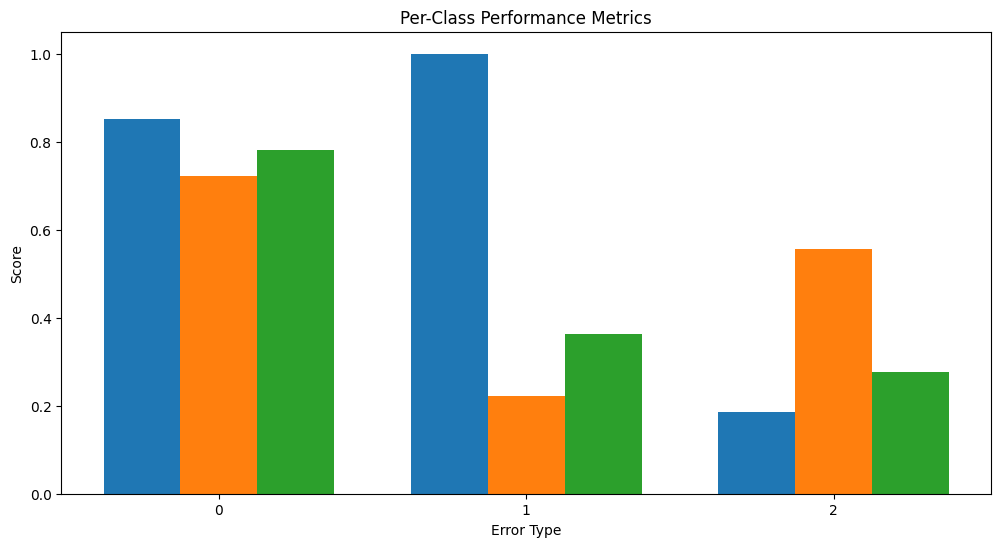

In [ ]:
import pandas as pd
import re
from typing import List, Dict, Any, Tuple
from neo4j import GraphDatabase
from langchain_community.graphs import Neo4jGraph
import os
from dotenv import load_dotenv
import openai  # Import the openai module
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class ReviewErrorDetector:
    """Class to detect semantic and contextual errors in product reviews using Neo4j KG and LLM."""

    def __init__(self, neo4j_uri: str, neo4j_username: str, neo4j_password: str, openai_api_key: str):
        """Initialize with Neo4j and OpenAI connection parameters."""
        self.uri = neo4j_uri
        self.auth = (neo4j_username, neo4j_password)
        self.graph = Neo4jGraph(url=neo4j_uri, username=neo4j_username, password=neo4j_password)

        # --- Azure OpenAI Setup ---
        # Get API keys and connection info from environment variables or defaults
        self.client = openai.AzureOpenAI(
            api_key=os.environ.get("AZURE_OPENAI_API_KEY"),  # Use os.environ.get() for safer key retrieval
            api_version=os.environ.get("AZURE_OPENAI_API_VERSION"),
            azure_deployment=os.environ.get("AZURE_OPENAI_DEPLOYMENT"),
            azure_endpoint=os.environ.get("AZURE_OPENAI_ENDPOINT")
        )

    def retrieve_product_info(self, product_id: str) -> Dict[str, Any]:
        """Retrieve product information from Neo4j knowledge graph."""
        # Query to get complete product information
        query = """
        MATCH (t:Tool {model_number: $product_id})
        OPTIONAL MATCH (t)-[:BELONGS_TO]->(c:Category)
        OPTIONAL MATCH (t)-[:HAS_SPECIFICATION]->(s:Specification)
        OPTIONAL MATCH (s)-[:HAS_UNIT]->(u:Unit)
        OPTIONAL MATCH (t)-[:COMPATIBLE_WITH]->(a:Accessory)
        OPTIONAL MATCH (t)-[:INCLUDES]->(i:IncludedItem)
        OPTIONAL MATCH (t)-[:HAS_LIMITATION]->(l:Limitation)
        RETURN t, c, collect(DISTINCT {spec: s, unit: u}) as specs,
               collect(DISTINCT a) as accessories,
               collect(DISTINCT i) as included_items,
               collect(DISTINCT l) as limitations
        """

        result = self.graph.query(query, {"product_id": product_id})

        if not result:
            return {"error": f"Product {product_id} not found in knowledge graph"}

        # Process and structure the product data
        product_data = {
            "model_number": result[0]["t"]["model_number"],
            "name": result[0]["t"]["name"],
            "category": result[0]["c"]["name"] if result[0]["c"] else "Unknown",
            "specifications": {},
            "accessories": [],
            "included_items": [],
            "limitations": []
        }

        # Process specifications
        for spec_info in result[0]["specs"]:
            if not spec_info["spec"]:
                continue

            spec = spec_info["spec"]
            unit = spec_info["unit"]

            spec_name = spec["name"] if "name" in spec else ""

            # Handle different specification value types
            if "numeric_value" in spec:
                value = spec["numeric_value"]
            elif "text_value" in spec:
                value = spec["text_value"]
            elif "value_min" in spec and "value_max" in spec:
                value = {
                    "min": spec["value_min"],
                    "max": spec["value_max"],
                    "is_range": True
                }
            else:
                value = None

            # Add unit information if available
            unit_symbol = unit["symbol"] if unit and "symbol" in unit else ""

            product_data["specifications"][spec_name] = {
                "value": value,
                "unit": unit_symbol
            }

        # Process accessories
        for acc in result[0]["accessories"]:
            if acc:
                product_data["accessories"].append(acc["name"])

        # Process included items
        for item in result[0]["included_items"]:
            if item:
                product_data["included_items"].append({
                    "name": item["name"],
                    "quantity": item.get("quantity", 1)
                })

        # Process limitations
        for limit in result[0]["limitations"]:
            if limit:
                limitation_data = {
                    "description": limit["description"],
                    "warning_type": limit.get("warning_type", "")
                }

                # Add min/max values if available
                if "min_value" in limit:
                    limitation_data["min_value"] = limit["min_value"]
                if "max_value" in limit:
                    limitation_data["max_value"] = limit["max_value"]
                if "unit" in limit:
                    limitation_data["unit"] = limit["unit"]

                product_data["limitations"].append(limitation_data)

        return product_data

    def analyze_review(self, review: str, product_data: Dict[str, Any]) -> Tuple[str, str]:
        """
        Analyze a review using LLM to detect semantic and contextual errors.
        Returns tuple of (error_type, explanation)
        """
        # Prepare context information about the product
        product_context = f"""
        PRODUCT INFORMATION:
        - Model: {product_data['model_number']}
        - Name: {product_data['name']}
        - Category: {product_data['category']}

        SPECIFICATIONS:
        """

        # Add specifications
        for spec_name, spec_info in product_data['specifications'].items():
            if isinstance(spec_info['value'], dict) and spec_info['value'].get('is_range'):
                product_context += f"- {spec_name}: {spec_info['value']['min']} - {spec_info['value']['max']} {spec_info['unit']}\n"
            else:
                product_context += f"- {spec_name}: {spec_info['value']} {spec_info['unit']}\n"

        # Add accessories
        product_context += "\nCOMPATIBLE ACCESSORIES:\n"
        for acc in product_data['accessories']:
            product_context += f"- {acc}\n"

        # Add included items
        product_context += "\nINCLUDED ITEMS:\n"
        for item in product_data['included_items']:
            product_context += f"- {item['name']} (Quantity: {item['quantity']})\n"

        # Add limitations
        product_context += "\nLIMITATIONS AND CONSTRAINTS:\n"
        for limitation in product_data['limitations']:
            product_context += f"- {limitation['description']}\n"
            if 'min_value' in limitation and 'max_value' in limitation:
                product_context += f"  Range: {limitation['min_value']} - {limitation['max_value']} {limitation.get('unit', '')}\n"

        # Prepare prompt for the LLM
        prompt = f"""
        You are analyzing product reviews for accuracy and identifying semantic misalignment or contextual errors.

        {product_context}

        REVIEW TO ANALYZE: "{review}"

        Please identify if there are any semantic misalignments or contextual errors in this review based on the product specifications and limitations.
        Semantic errors refer to using terms incorrectly (e.g., calling a planer a hammer).
        Contextual errors refer to mentioning features, capabilities, or limitations that don't match the product's actual specifications.

        Answer in the following format:
        ERROR_TYPE: [None/Semantic/Contextual/Both]
        EXPLANATION: [Detailed explanation of the errors found or why no errors were detected]
        """
        response = self.client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are analyzing product reviews for accuracy and identifying semantic misalignment or contextual errors."},
                {"role": "user", "content": prompt}
            ],
            model=os.environ.get("AZURE_OPENAI_DEPLOYMENT", "gpt-4o"),  # Get model name from env or default
            temperature=0
        )


        # Extract error type and explanation
        error_type_match = re.search(r'ERROR_TYPE:\s*(None|Semantic|Contextual|Both)', response.choices[0].message.content)
        explanation_match = re.search(r'EXPLANATION:\s*(.*?)(?:\n\n|$)', response.choices[0].message.content, re.DOTALL)

        error_type = error_type_match.group(1) if error_type_match else "Unknown"
        explanation = explanation_match.group(1).strip() if explanation_match else "No explanation provided."

        return error_type, explanation

    def process_reviews(self, reviews_file: str) -> pd.DataFrame:
        """Process reviews from Excel file and detect errors."""
        # Load reviews from Excel
        df = pd.read_excel(reviews_file)

        # Map Review_Type to standard error types if it exists
        if 'Review_Type' in df.columns:
            # Create mapping from Review_Type to standard error categories
            review_type_map = {
                'Normal': 'None',
                'Semantic Misalignment': 'Semantic',
                'Specialized Error': 'Contextual',
                # Add more mappings if needed
            }

            # Create Actual_Error_Type column based on the mapping
            df['Actual_Error_Type'] = df['Review_Type'].map(review_type_map)
            print(f"Using 'Review_Type' column for ground truth labels. Mapped {len(df)} reviews.")
        else:
            # If no Review_Type, create empty Actual_Error_Type column
            print("Warning: 'Review_Type' column not found. Creating empty column for ground truth labels.")
            df['Actual_Error_Type'] = None

        # Add columns for error flagging and explanation
        df['Predicted_Error_Type'] = None
        df['Explanation'] = None

        # Process each review
        for index, row in df.iterrows():
            print(f"Processing review {index+1}/{len(df)}...")
            product_id = row['Product_ID']
            review = row['Review']

            # Retrieve product information from Neo4j
            product_data = self.retrieve_product_info(product_id)

            if 'error' in product_data:
                df.at[index, 'Predicted_Error_Type'] = 'Data Error'
                df.at[index, 'Explanation'] = product_data['error']
                continue

            # Analyze the review using LLM
            error_type, explanation = self.analyze_review(review, product_data)

            # Update DataFrame with results
            df.at[index, 'Predicted_Error_Type'] = error_type
            df.at[index, 'Explanation'] = explanation

        # Save results to Excel
        output_file = reviews_file.replace('.xlsx', '_analyzed.xlsx')
        df.to_excel(output_file, index=False)

        return df

    def calculate_accuracy_metrics(self, df: pd.DataFrame) -> Dict[str, Any]:
        """Calculate accuracy metrics based on actual vs predicted error types."""
        if 'Actual_Error_Type' not in df.columns or df['Actual_Error_Type'].isna().all():
            return {"error": "No ground truth labels found. Cannot calculate accuracy metrics."}

        # Filter out rows with Data Error
        valid_df = df[(df['Predicted_Error_Type'] != 'Data Error') & (~df['Actual_Error_Type'].isna())]

        if len(valid_df) == 0:
            return {"error": "No valid predictions found. Cannot calculate accuracy metrics."}

        # Convert error types to numeric labels for metrics calculation
        error_type_map = {'None': 0, 'Semantic': 1, 'Contextual': 2, 'Both': 3}

        # Map any values not in the standard error types to None for safety
        valid_df['Actual_Error_Type_Mapped'] = valid_df['Actual_Error_Type'].apply(
            lambda x: x if x in error_type_map else 'None'
        )
        valid_df['Predicted_Error_Type_Mapped'] = valid_df['Predicted_Error_Type'].apply(
            lambda x: x if x in error_type_map else 'None'
        )

        y_true = valid_df['Actual_Error_Type_Mapped'].map(error_type_map)
        y_pred = valid_df['Predicted_Error_Type_Mapped'].map(error_type_map)

        # Calculate metrics
        metrics = {
            'accuracy': accuracy_score(y_true, y_pred),
            'precision_macro': precision_score(y_true, y_pred, average='macro'),
            'recall_macro': recall_score(y_true, y_pred, average='macro'),
            'f1_macro': f1_score(y_true, y_pred, average='macro'),
            'confusion_matrix': confusion_matrix(y_true, y_pred).tolist(),
            'class_labels': list(error_type_map.keys())
        }

        return metrics

    def visualize_results(self, df: pd.DataFrame, output_dir: str = "./"):
        """Visualize the analysis results and save the plots."""
        if 'Actual_Error_Type' not in df.columns or df['Actual_Error_Type'].isna().all():
            print("No ground truth labels found. Cannot generate visualizations for accuracy metrics.")
            return

        # Filter out rows with Data Error
        valid_df = df[(df['Predicted_Error_Type'] != 'Data Error') & (~df['Actual_Error_Type'].isna())]

        if len(valid_df) == 0:
            print("No valid predictions found. Cannot generate visualizations.")
            return

        # Create standardized columns for visualization
        error_type_map = {'None': 0, 'Semantic': 1, 'Contextual': 2, 'Both': 3}

        # Map any values not in the standard error types to None for safety
        valid_df['Actual_Error_Type_Mapped'] = valid_df['Actual_Error_Type'].apply(
            lambda x: x if x in error_type_map else 'None'
        )
        valid_df['Predicted_Error_Type_Mapped'] = valid_df['Predicted_Error_Type'].apply(
            lambda x: x if x in error_type_map else 'None'
        )

        # 1. Distribution of error types (actual vs predicted)
        plt.figure(figsize=(12, 6))

        # Create a grouped bar chart
        error_types = ['None', 'Semantic', 'Contextual', 'Both']
        actual_counts = [len(valid_df[valid_df['Actual_Error_Type_Mapped'] == et]) for et in error_types]
        predicted_counts = [len(valid_df[valid_df['Predicted_Error_Type_Mapped'] == et]) for et in error_types]

        x = np.arange(len(error_types))
        width = 0.35

        plt.bar(x - width/2, actual_counts, width, label='Actual')
        plt.bar(x + width/2, predicted_counts, width, label='Predicted')

        plt.xlabel('Error Type')
        plt.ylabel('Count')
        plt.title('Distribution of Error Types: Actual vs Predicted')
        plt.xticks(x, error_types)
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.savefig(os.path.join(output_dir, 'error_type_distribution.png'), dpi=300, bbox_inches='tight')
        plt.close()

        # 2. Confusion Matrix
        error_type_map = {'None': 0, 'Semantic': 1, 'Contextual': 2, 'Both': 3}

        y_true = valid_df['Actual_Error_Type_Mapped'].map(error_type_map)
        y_pred = valid_df['Predicted_Error_Type_Mapped'].map(error_type_map)

        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=error_types,
                    yticklabels=error_types)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')

        plt.savefig(os.path.join(output_dir, 'confusion_matrix.png'), dpi=300, bbox_inches='tight')
        plt.close()

        # 3. Per-class metrics
        unique_classes = np.unique(np.concatenate([y_true, y_pred]))
        actual_error_types = [error_types[int(cls)] for cls in unique_classes]
        # Calculate metrics only for classes that exist
        precision_per_class = precision_score(y_true, y_pred, average=None, labels=unique_classes)
        recall_per_class = recall_score(y_true, y_pred, average=None, labels=unique_classes)
        f1_per_class = f1_score(y_true, y_pred, average=None, labels=unique_classes)

        plt.figure(figsize=(12, 6))

        x = np.arange(len(actual_error_types))
        width = 0.25

        plt.bar(x - width, precision_per_class, width, label='Precision')
        plt.bar(x, recall_per_class, width, label='Recall')
        plt.bar(x + width, f1_per_class, width, label='F1 Score')

        plt.xlabel('Error Type')
        plt.ylabel('Score')
        plt.title('Per-Class Performance Metrics')
        plt.xticks(x, error_types)
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.savefig(os.path.join(output_dir, 'per_class_metrics.png'), dpi=300, bbox_inches='tight')
        plt.close()

        # 4. Product-wise error distribution
        product_errors = valid_df.groupby('Product_ID')['Predicted_Error_Type_Mapped'].value_counts().unstack().fillna(0)

        if not product_errors.empty:
            plt.figure(figsize=(14, 8))
            product_errors.plot(kind='bar', stacked=True, colormap='viridis')
            plt.xlabel('Product ID')
            plt.ylabel('Count')
            plt.title('Error Type Distribution by Product')
            plt.legend(title='Error Type')
            plt.xticks(rotation=45)
            plt.grid(axis='y', linestyle='--', alpha=0.7)

            plt.savefig(os.path.join(output_dir, 'product_error_distribution.png'), dpi=300, bbox_inches='tight')
            plt.close()

def main():
    # Load environment variables
    load_dotenv()

    # Create output directory for visualizations
    output_dir = "./results"
    os.makedirs(output_dir, exist_ok=True)

    # Set Azure OpenAI API Details
    os.environ["AZURE_OPENAI_API_KEY"] = "CGovkeIlaBZW0ZxDj7PxwwAKGcbmHaa9IHuIHhlpl11wWG2uiclUJQQJ99BBACYeBjFXJ3w3AAABACOGuRYX"  # Replace with your actual key
    os.environ["AZURE_OPENAI_ENDPOINT"] = "https://llm-data-quality.openai.azure.com/"
    os.environ["AZURE_OPENAI_DEPLOYMENT"] = "gpt-4o"  # Must match Azure
    os.environ["AZURE_OPENAI_API_VERSION"] = "2024-08-01-preview"  # Recommended version

    print("\n===============================")
    print("BOSCH TOOL REVIEW ANALYZER")
    print("===============================\n")
    print("This program analyzes Bosch tool reviews for semantic and contextual errors")
    print("using the Neo4j knowledge graph and Azure OpenAI API.\n")

    # Get API keys and connection info from environment variables
    neo4j_uri = os.getenv("NEO4J_URI") or "neo4j+s://8ee3c741.databases.neo4j.io"
    neo4j_username = os.getenv("NEO4J_USERNAME") or "neo4j"
    neo4j_password = os.getenv("NEO4J_PASSWORD") or "IA36BLF3uO0pH_A2A0h-3wJ1EhPIT-ye-bgae9AO-t8"  # Replace with your actual password
    openai_api_key = os.getenv("OPENAI_API_KEY") or "your-openai-api-key"

    # Initialize error detector
    detector = ReviewErrorDetector(neo4j_uri, neo4j_username, neo4j_password, openai_api_key)

    # Process reviews
    reviews_file = "/content/bosch_reviews_100_new.xlsx"
    result_df = detector.process_reviews(reviews_file)

    print(f"Analysis complete. Results saved to {reviews_file.replace('.xlsx', '_analyzed.xlsx')}")

    # Calculate accuracy metrics
    metrics = detector.calculate_accuracy_metrics(result_df)

    if "error" in metrics:
        print(f"Error calculating metrics: {metrics['error']}")
    else:
        print("\nAccuracy Metrics:")
        print(f"Overall Accuracy: {metrics['accuracy']:.4f}")
        print(f"Macro Precision: {metrics['precision_macro']:.4f}")
        print(f"Macro Recall: {metrics['recall_macro']:.4f}")
        print(f"Macro F1 Score: {metrics['f1_macro']:.4f}")

        print("\nConfusion Matrix:")
        print(f"Labels: {metrics['class_labels']}")
        for row in metrics['confusion_matrix']:
            print(row)

    # Create visualizations
    detector.visualize_results(result_df, output_dir)
    print(f"Visualizations saved to {output_dir}")

    # Display summary
    error_counts = result_df['Predicted_Error_Type'].value_counts()
    print("\nPredicted Error Type Summary:")
    for error_type, count in error_counts.items():
        print(f"- {error_type}: {count}")

    if 'Actual_Error_Type' in result_df.columns and not result_df['Actual_Error_Type'].isna().all():
        actual_counts = result_df['Actual_Error_Type'].value_counts()
        print("\nActual Error Type Summary:")
        for error_type, count in actual_counts.items():
            print(f"- {error_type}: {count}")

if __name__ == "__main__":
    main()